In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# Use sklearn models
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

np.random.seed(42)

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Ensure we have at least 5000 images, sampled evenly from each class
class_counts = y.value_counts()
samples_per_class = 5000 // 10
samples = []

# Sample images ensuring all classes are represented
for digit in range(10):
    digit_indices = np.where(y == str(digit))[0]
    selected_indices = np.random.choice(digit_indices, size=samples_per_class, replace=False)
    samples.append(X.iloc[selected_indices])

In [2]:
# Extract sampled data
X_sampled = pd.concat(samples)
y_sampled = y.iloc[np.concatenate([np.where(y == str(digit))[0][:samples_per_class] for digit in range(10)])]

# Reduce dimensionality to 100 dimensions using PCA
pca = PCA(n_components=100)
X_reduced = pca.fit_transform(X_sampled)

# Split the data into training and validation sets (70% train, 30% validation)
X_train_original, X_val_original, y_train_original, y_val_original = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)
X_train_reduced, X_val_reduced, y_train_reduced, y_val_reduced = train_test_split(X_reduced, y_sampled, test_size=0.3, random_state=42)

# Train Logistic Regression on original data
start_time_original = time.time()
log_reg_original = LogisticRegression(max_iter=1000, solver='lbfgs', n_jobs=-1)
log_reg_original.fit(X_train_original, y_train_original)
y_pred_original = log_reg_original.predict(X_val_original)
end_time_original = time.time()

# Multinomial Logistic Regression on reduced data
start_time_reduced = time.time()
log_reg_reduced = LogisticRegression(max_iter=1000, solver='lbfgs', n_jobs=-1)
log_reg_reduced.fit(X_train_reduced, y_train_reduced)
y_pred_reduced = log_reg_reduced.predict(X_val_reduced)
end_time_reduced = time.time()

# Evaluate accuracy and time for original data
accuracy_original = accuracy_score(y_val_original, y_pred_original)
execution_time_original = end_time_original - start_time_original

# Evaluate accuracy and time for reduced data
accuracy_reduced = accuracy_score(y_val_reduced, y_pred_reduced)
execution_time_reduced = end_time_reduced - start_time_reduced

# Print results
print("Results for original data (784 dimensions):")
print(f"Accuracy: {accuracy_original:.4f}")
print(f"Execution Time: {execution_time_original:.4f} seconds")

print("\nResults for reduced data (100 dimensions):")
print(f"Accuracy: {accuracy_reduced:.4f}")
print(f"Execution Time: {execution_time_reduced:.4f} seconds")

# Train Logistic Regression on data reduced after split
X_reduced_after_split = pca.fit_transform(X_train_original)

# Split again
X_train_after_split, X_val_after_split, y_train_after_split, y_val_after_split = train_test_split(X_reduced_after_split, y_train_original, test_size=0.3, random_state=42)

# Train Logistic Regression on reduced data after split
start_time_reduced_after_split = time.time()
log_reg_reduced_after_split = LogisticRegression(max_iter=1000, solver='lbfgs', n_jobs=-1)
log_reg_reduced_after_split.fit(X_train_after_split, y_train_after_split)
y_pred_reduced_after_split = log_reg_reduced_after_split.predict(X_val_after_split)
end_time_reduced_after_split = time.time()

# Evaluate accuracy and time for reduced data after split
accuracy_reduced_after_split = accuracy_score(y_val_after_split, y_pred_reduced_after_split)
execution_time_reduced_after_split = end_time_reduced_after_split - start_time_reduced_after_split

print("\nResults for reduced data (100 dimensions) after split:")
print(f"Accuracy: {accuracy_reduced_after_split:.4f}")
print(f"Execution Time: {execution_time_reduced_after_split:.4f} seconds")

Results for original data (784 dimensions):
Accuracy: 0.8747
Execution Time: 1.7680 seconds

Results for reduced data (100 dimensions):
Accuracy: 0.8300
Execution Time: 1.6601 seconds

Results for reduced data (100 dimensions) after split:
Accuracy: 0.8095
Execution Time: 0.7145 seconds



Comparison Results:
                Approach  Accuracy  Execution Time (s)
0               Original  0.874667            1.767962
1    Reduced (PCA First)  0.830000            1.660105
2  Reduced (After Split)  0.809524            0.714480


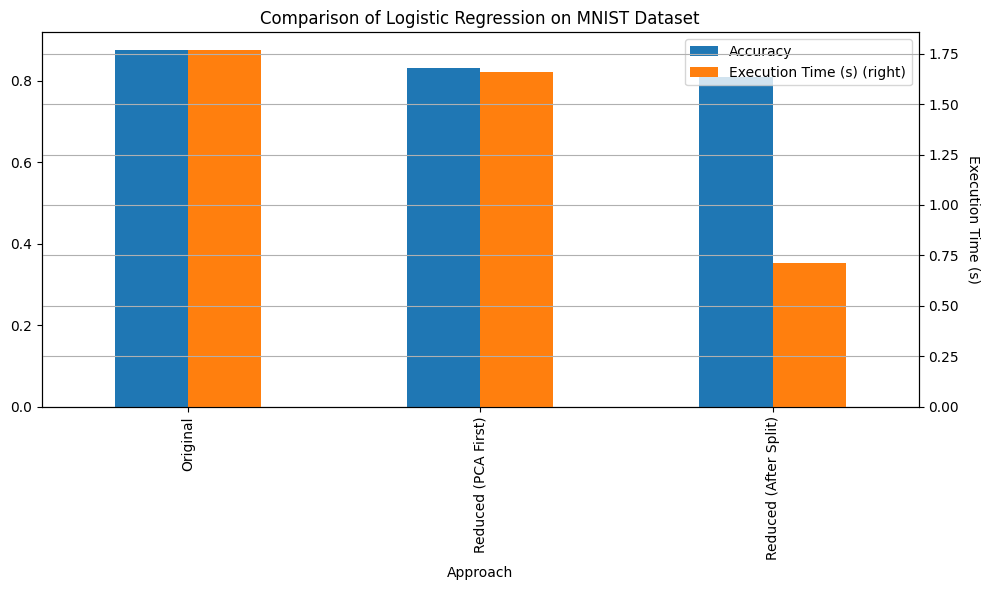

In [3]:
# Compare results
comparison_df = pd.DataFrame({
    'Approach': ['Original', 'Reduced (PCA First)', 'Reduced (After Split)'],
    'Accuracy': [accuracy_original, accuracy_reduced, accuracy_reduced_after_split],
    'Execution Time (s)': [execution_time_original, execution_time_reduced, execution_time_reduced_after_split]
})

print("\nComparison Results:")
print(comparison_df)

# Plotting the results
comparison_df.set_index('Approach').plot(kind='bar', figsize=(10, 6), secondary_y='Execution Time (s)')
plt.title('Comparison of Logistic Regression on MNIST Dataset')
plt.ylabel('Accuracy')
plt.ylabel('Execution Time (s)', rotation=270, labelpad=15)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()